# Hurricanes and Typhoons, 1851-2014

In [ ]:
Data set contains 49106 Northeast and North Central Pacific hurricane database 

In [1]:
# Status of Hurricanes and typhoons with abbrivations:
    
# TD – Tropical cyclone of tropical depression intensity (< 34 knots)
# TS – Tropical cyclone of tropical storm intensity (34-63 knots)
# HU – Tropical cyclone of hurricane intensity (> 64 knots)
# EX – Extratropical cyclone (of any intensity)
# SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
# SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
# LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
# WV – Tropical Wave (of any intensity)
# DB – Disturbance (of any intensity)

# Contents

In [2]:
#a) Data Loading
#b) Data Cleaning and processing
#c) Implimntation of different Algoritm 
#d) Checking for maximum accuracy among algorithm
#e) Exploration based on Hurricanes and Typhoons
#f) Exploration based on Hurricanes and Typhoons status
#g) Exploration based on Month
#h) Exploration based on Year
#i) Exploration based on Minimum Pressure at different Status
#j) Exploration based on Maximum Wind Speed at different Status

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Read the CSV file

In [5]:
data = pd.read_csv('pacific.csv')
data

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,20151129,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Checking for null values

In [7]:
data.isnull().any()

ID                  False
Name                False
Date                False
Time                False
Event               False
Status              False
Latitude            False
Longitude           False
Maximum Wind        False
Minimum Pressure    False
Low Wind NE         False
Low Wind SE         False
Low Wind SW         False
Low Wind NW         False
Moderate Wind NE    False
Moderate Wind SE    False
Moderate Wind SW    False
Moderate Wind NW    False
High Wind NE        False
High Wind SE        False
High Wind SW        False
High Wind NW        False
dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                26137 non-null  object
 1   Name              26137 non-null  object
 2   Date              26137 non-null  int64 
 3   Time              26137 non-null  int64 
 4   Event             26137 non-null  object
 5   Status            26137 non-null  object
 6   Latitude          26137 non-null  object
 7   Longitude         26137 non-null  object
 8   Maximum Wind      26137 non-null  int64 
 9   Minimum Pressure  26137 non-null  int64 
 10  Low Wind NE       26137 non-null  int64 
 11  Low Wind SE       26137 non-null  int64 
 12  Low Wind SW       26137 non-null  int64 
 13  Low Wind NW       26137 non-null  int64 
 14  Moderate Wind NE  26137 non-null  int64 
 15  Moderate Wind SE  26137 non-null  int64 
 16  Moderate Wind SW  26137 non-null  int64 
 17  Moderate Win

In [9]:
#copy the dataset

In [10]:
pred_columns = data[:]
pred_columns

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,20151129,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Drop column "status, event,latitude,longitude,id,name" from data 

In [12]:
pred_columns.drop(['Status'], axis=1, inplace=True)
pred_columns.drop(['Event'], axis=1, inplace=True)
pred_columns.drop(['Latitude'], axis=1, inplace=True)
pred_columns.drop(['Longitude'], axis=1, inplace=True)
pred_columns.drop(['ID'], axis=1, inplace=True)
pred_columns.drop(['Name'], axis=1, inplace=True)

In [13]:
pred_columns

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,19490611,0,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,19490611,600,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,19490611,1200,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,19490611,1800,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,19490612,0,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,20151128,1200,35,1002,60,0,0,0,0,0,0,0,0,0,0,0
26133,20151128,1800,30,1007,0,0,0,0,0,0,0,0,0,0,0,0
26134,20151129,0,30,1008,0,0,0,0,0,0,0,0,0,0,0,0
26135,20151129,600,25,1009,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Columns which will be used for amalysis

In [15]:
prediction_var = pred_columns.columns
prediction_var

Index(['Date', 'Time', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

In [16]:
#Train : Test split is 70:30 choosing 70% training and 30% test

In [17]:
train,test = train_test_split(data, test_size=0.3)

In [18]:
train.shape

(18295, 22)

In [19]:
test.shape

(7842, 22)

In [20]:
train_X = train[prediction_var]
train_y = train['Status']
print(list(train.columns))

['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [21]:
test_X = test[prediction_var]
test_y = test['Status']
print(list(test.columns))

['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


# Checking through decision tree

In [22]:
model = tree.DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
prediction

array([' TD', ' HU', ' TS', ..., ' TD', ' EX', ' TD'], dtype=object)

In [23]:
df = pd.DataFrame(prediction, test_y)
df

,0
Status,
TD,TD
HU,HU
TS,TS
TS,TS
HU,HU
...,...
TD,TD
HU,HU
TD,TD


In [24]:
metrics.accuracy_score(test_y, prediction)

0.9650599336903851

# Checking through Logistic regression

In [25]:
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [26]:
prediction = model.predict(test_X)
prediction

array([' TS', ' TS', ' TS', ..., ' TS', ' TS', ' TS'], dtype=object)

In [27]:
metrics.accuracy_score(test_y, prediction)

0.38102524866105586

# Checking through Random forest

In [28]:
rf = RandomForestClassifier(n_estimators=98, criterion='entropy')
rf.fit(train_X, train_y)
prediction = rf.predict(test_X)
prediction

array([' TD', ' HU', ' TS', ..., ' TD', ' EX', ' TD'], dtype=object)

In [29]:
metrics.accuracy_score(test_y, prediction)

0.9577913797500638

In [30]:
#GridSearch

In [31]:
tuned_parameters = [{'n_estimators' : range(1,100)}]

In [32]:
model = GridSearchCV(RandomForestClassifier(), tuned_parameters)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

In [33]:
model.best_params_

{'n_estimators': 41}

In [34]:
rf = RandomForestClassifier(n_estimators=69, criterion='entropy')
rf.fit(train_X, train_y)
prediction = rf.predict(test_X)
prediction

array([' TD', ' HU', ' TS', ..., ' TD', ' EX', ' TD'], dtype=object)

In [35]:
metrics.accuracy_score(test_y, prediction)

0.958301453710788

# Inference from Different Algorithm

In [36]:
#a) Heighest accuracy is obtained using decission tree
#b) In decission tree Accuracy obtained is 96.5%
#c) Same Way Random forest has also highest accuracy which is 95.6%



# EXPLORATORY DATA ANALAYSIS

In [37]:
# Read the CSV file

In [38]:
data

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,20151129,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Convert the date format to date time

In [40]:
data['Date']=pd.to_datetime(data["Date"], format='%Y%m%d')

In [41]:
#Spliiting month and Year from Date field

In [42]:
data['Month'] =data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [43]:
data

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Month,Year
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,6,1949
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,6,1949
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,6,1949
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,6,1949
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,6,1949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,11,2015
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,11,2015
26134,EP222015,SANDRA,2015-11-29,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,11,2015
26135,EP222015,SANDRA,2015-11-29,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,11,2015


# Exploration based on Hurricane and Typhoon

In [44]:
#Total count of diffrent hurricanes and Typhoons

In [45]:
total_type=data.groupby("Name")["Name"].count().sort_values(ascending=False)
total_type.head(10)

Name
            UNNAMED    2180
           FERNANDA     318
               JOHN     295
            ESTELLE     293
             DANIEL     292
          GUILLERMO     285
             HILARY     277
           CARLOTTA     266
          GENEVIEVE     264
             BLANCA     258
Name: Name, dtype: int64

In [46]:
# plot the graph for top 10 Hurricanes and Typhoons

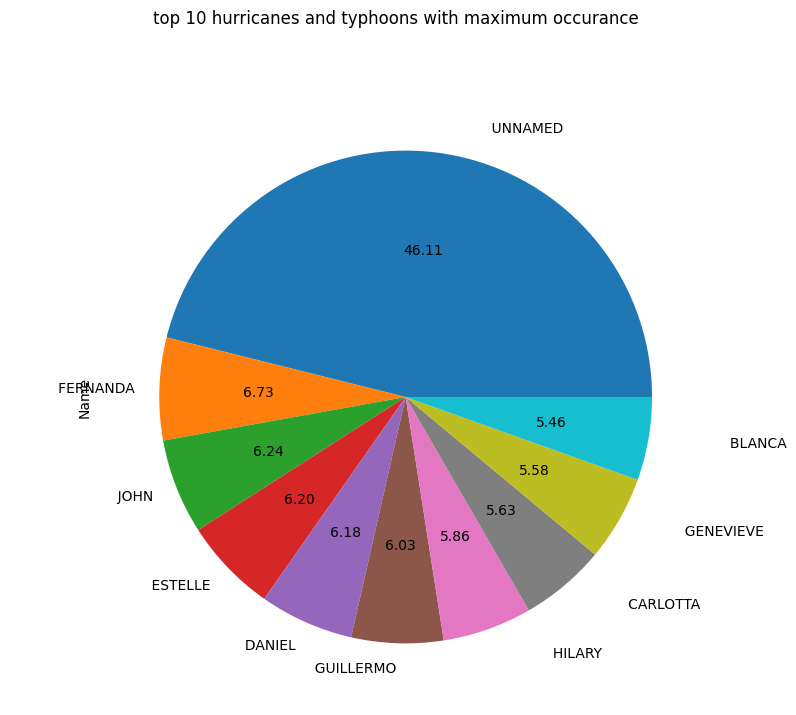

In [47]:
total_type.head(10).plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(8,8), title='top 10 hurricanes and typhoons with maximum occurance')
plt.show()

In [ ]:
Inference from Hurricanes and Typhoon Occurances
a) There are many as 2180 "UNNAMED" Hurricanes and Typhoons occurances
a) "FERNAND" and "JOHN" are second and third highest typhoons with 318 and 295 occurances

# Exploration Based on Cyclone status

In [48]:
# Count of cyclone status status 

In [65]:
Hurricane_type=data.groupby("Status")["Status"].count().sort_values(ascending=False)
Hurricane_type

Status
 TS     10076
 TD      6965
 HU      6765
 LO      1828
 DB       217
 ET       152
 EX       110
 SS         7
 PT         6
 ST         6
 SD         4
 HU         1
Name: Status, dtype: int64

In [50]:
# plot the Line graph for top 10 Cyclone Status

Text(0, 0.5, 'Frequency')

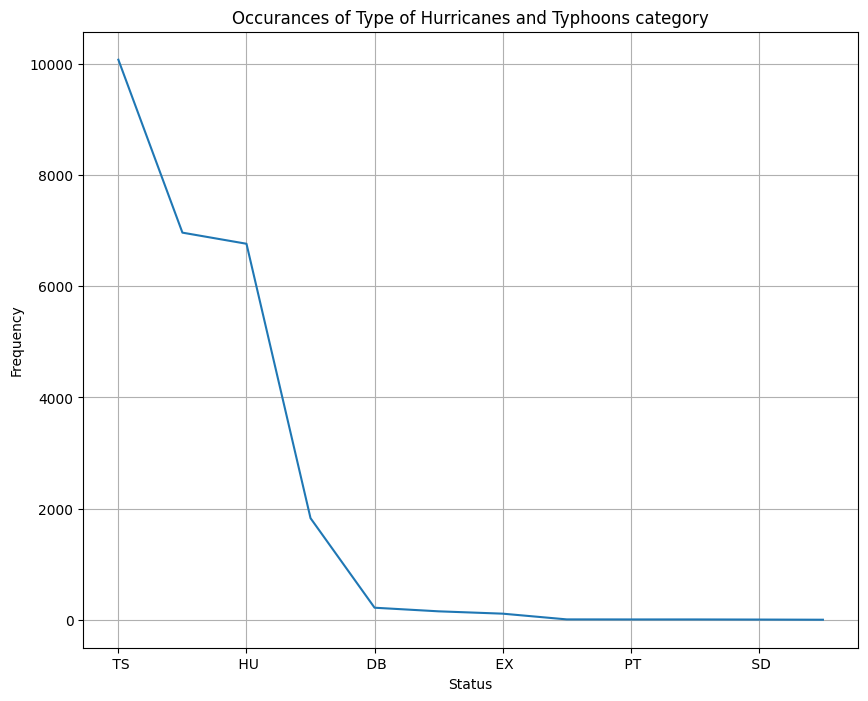

In [51]:
Hurricane_type.plot(kind='line', figsize=(10,8), title="Occurances of Type of Hurricanes and Typhoons category",grid=True)
plt.ylabel('Frequency')

# Inference from Cyclone Status

In [ ]:
a)TS – Tropical cyclone of tropical storm intensity (34-63 knots) has maximum occurances
b)TD – Tropical cyclone of tropical depression intensity (< 34 knots) has second maximum occurance and followed by HU – Tropical cyclone of hurricane intensity (> 64 knots)
c)SD – Subtropical cyclone of subtropical depression intensity (< 34 knots) has the lowest occurance

# Exploration Based on Status of Cyclones vs. Months

In [52]:
# Count of Hurricane and Typhoons status across months

In [53]:
Month_dist=data.groupby("Month")["Status"].count().sort_values(ascending=False)
Month_dist

Month
8     6931
9     6206
7     5345
10    3560
6     2653
5      634
11     592
12     151
2       33
1       21
3       11
Name: Status, dtype: int64

In [54]:
# plot the bar graph for Hurricanes and Typhoons Status across months

Text(0, 0.5, 'Frequency')

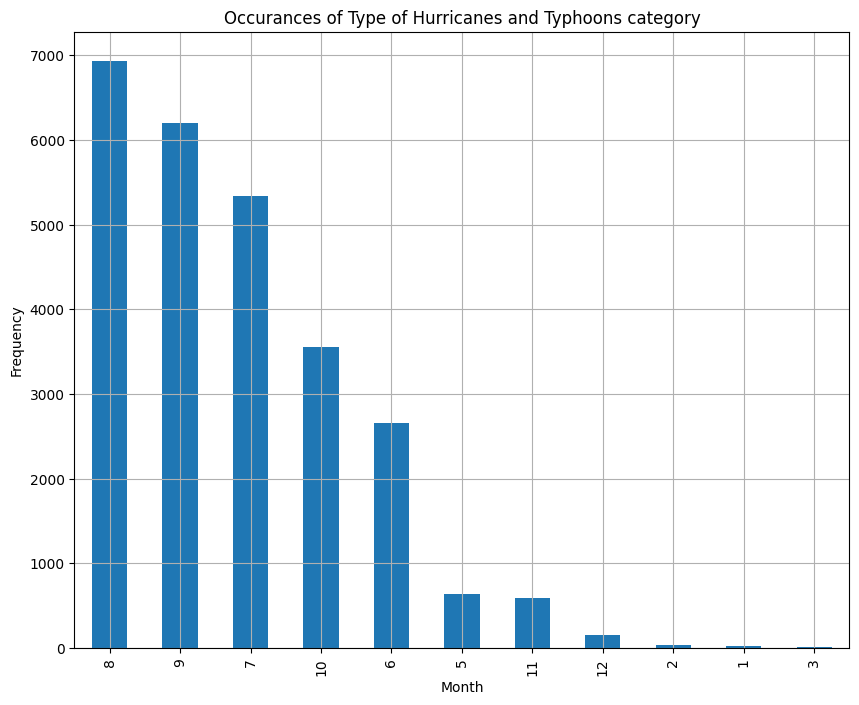

In [55]:
Month_dist.plot(kind='bar', figsize=(10,8), title="Occurances of Type of Hurricanes and Typhoons category",grid=True)
plt.ylabel('Frequency')

# Inference of cyclone status at different months

In [ ]:
a) Maximum of Cyclone occured in October month followed by September month
b) Least of cyclone occured in November to March Month

# Exploration Based on Status of Cyclones vs. Years

In [56]:
# Count of Hurricane and Typhoons status across Years

In [57]:
Year_dist=data.groupby("Year")["Status"].count().sort_values(ascending=False)
Year_dist

Year
1992    890
2014    840
1990    767
1997    725
2015    717
       ... 
1952     95
1949     82
1955     70
1964     63
1953     52
Name: Status, Length: 67, dtype: int64

In [58]:
# plot the bar graph for Hurricanes and Typhoons Status across Years

Text(0, 0.5, 'Frequency')

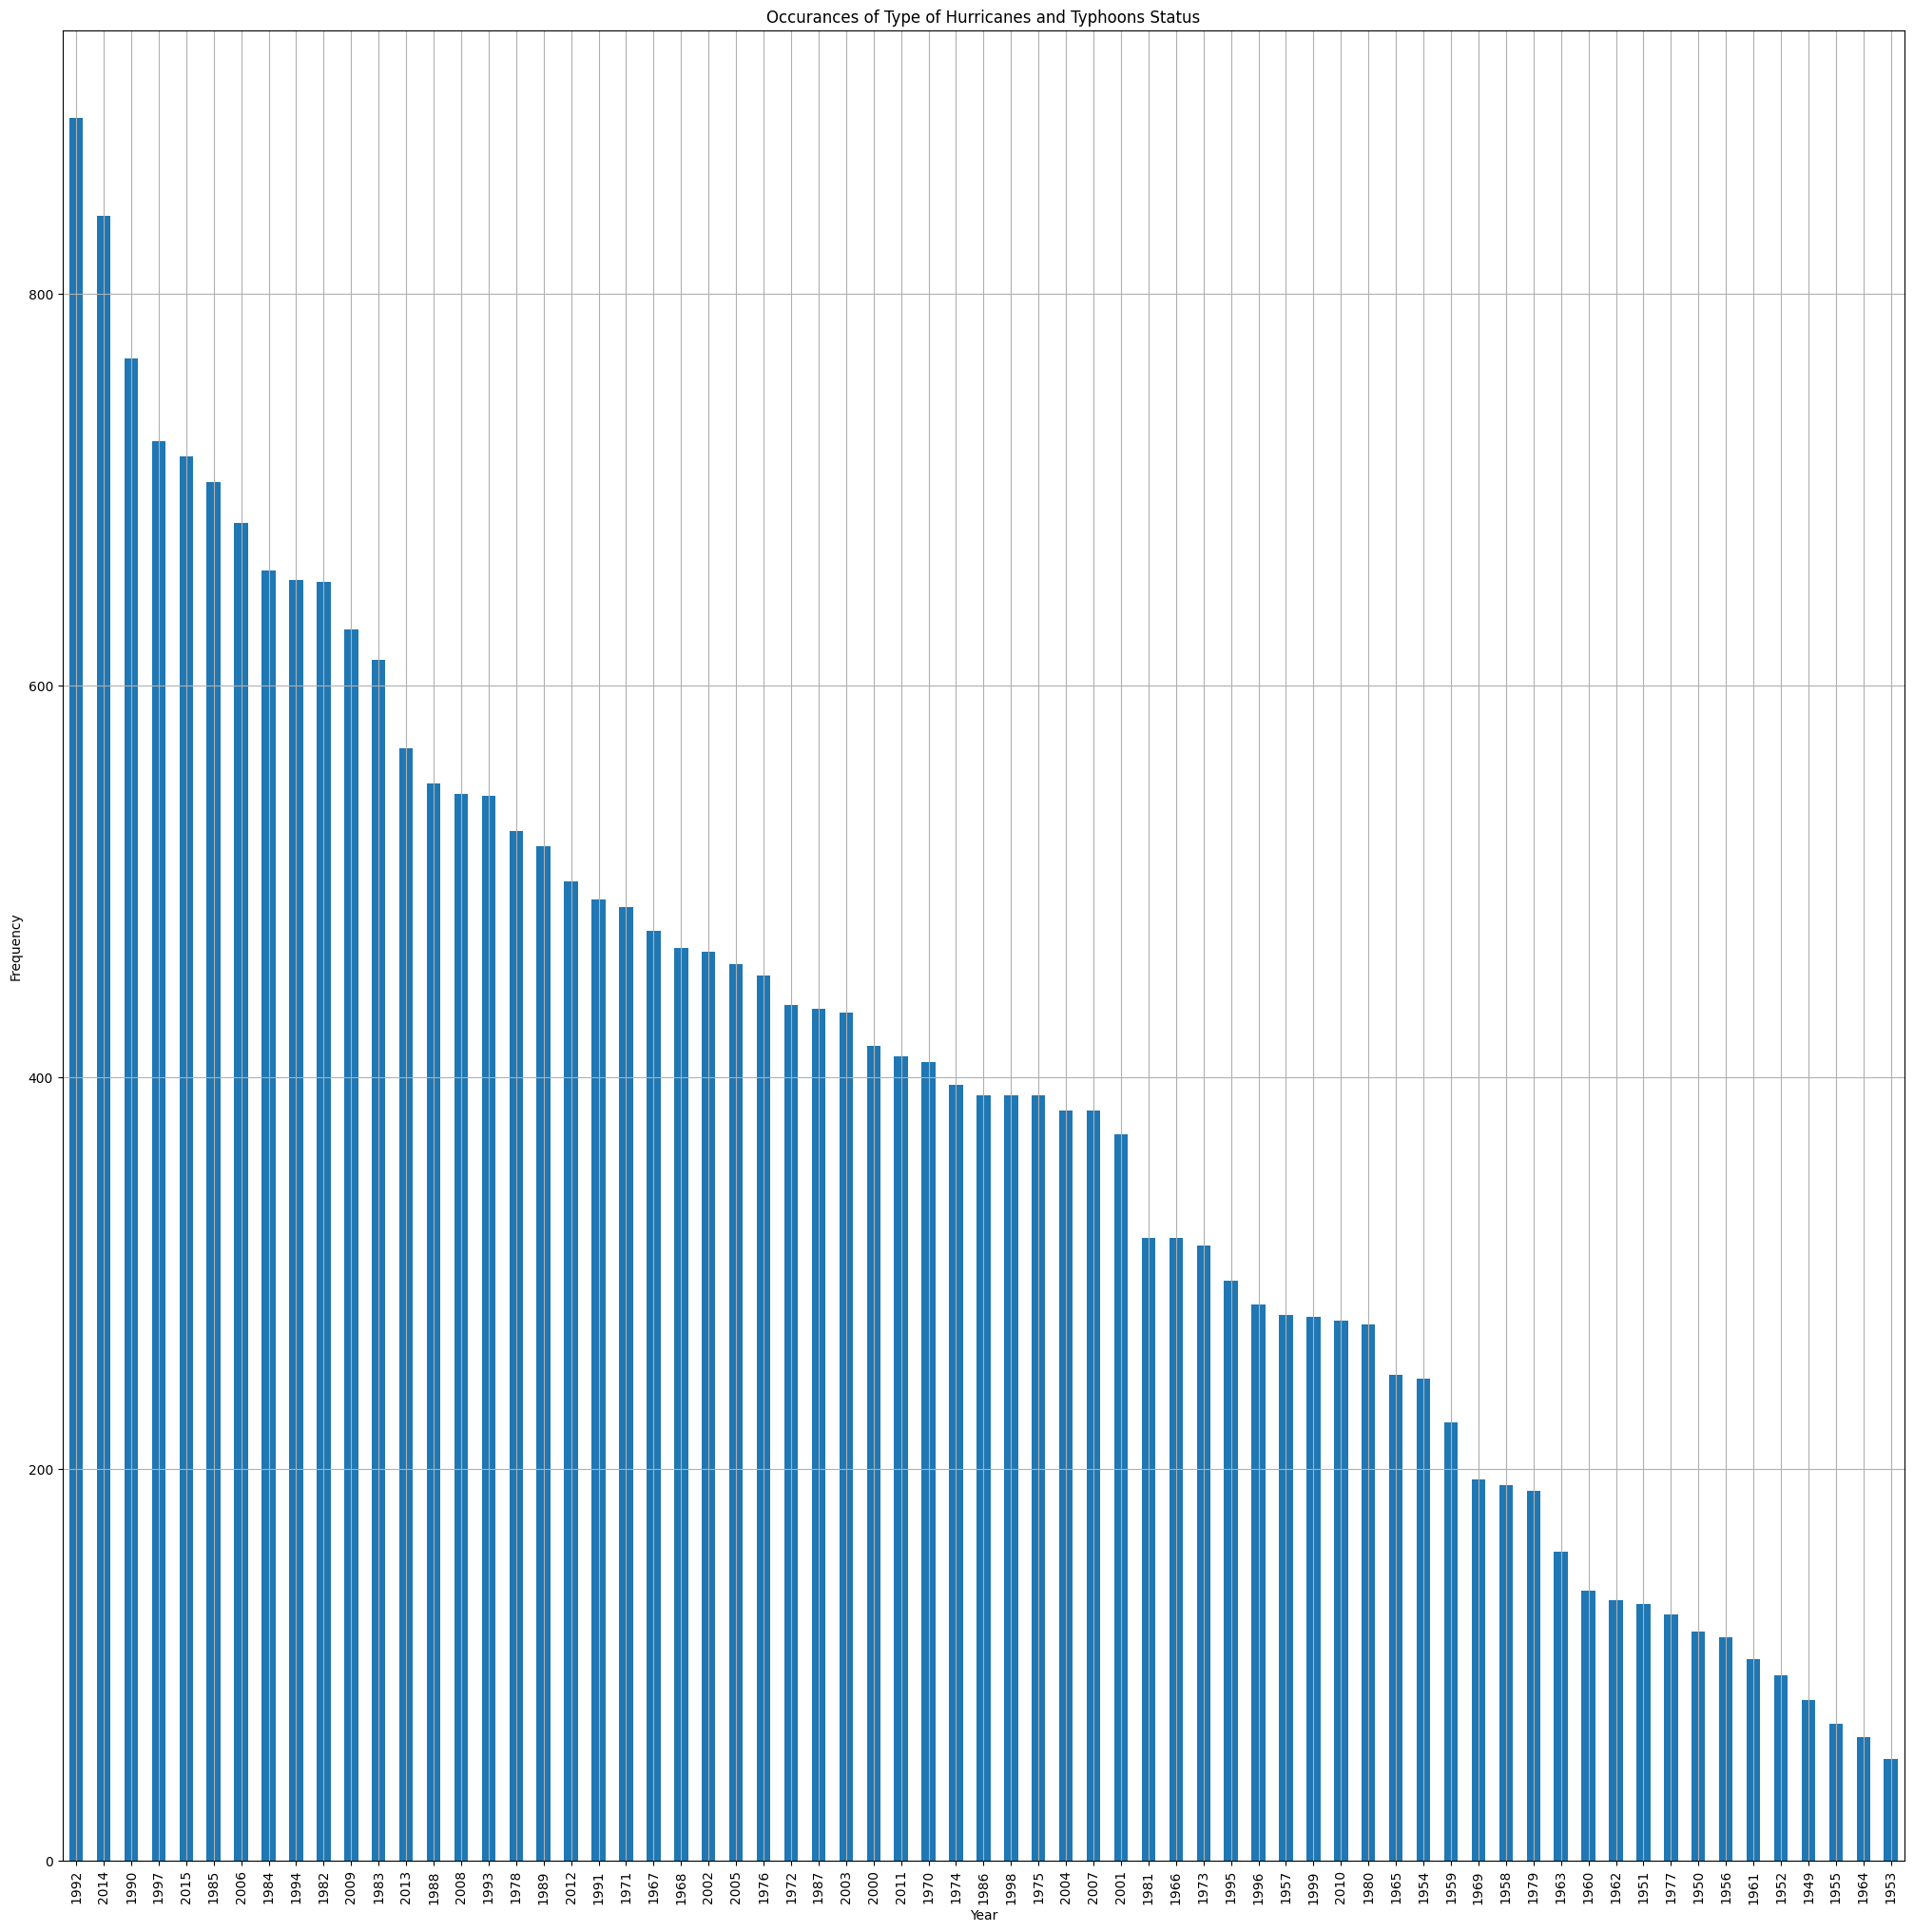

In [59]:
Year_dist.plot(kind='bar', figsize=(25,25), title="Occurances of Type of Hurricanes and Typhoons Status",grid=True)
plt.ylabel('Frequency')

# Inference Of Cyclone status across years

In [ ]:
a) In the year 1992 there was a maximum occuranced of cyclones in pacific regions, Followed by year 2014 with second highest cyclone
b) In the year 1953 There was a minimum occurances of cyclone in pacific Regions

# Exploration Based on Minimun pressure against Cyclones

In [60]:
# Average of Hurricane and Typhoons minimum pressure

In [61]:
Min_pressure_dist=data.groupby("Status")["Minimum Pressure"].mean().sort_values(ascending=False)
Min_pressure_dist

Status
 DB     1008.824885
 PT     1004.000000
 SD     1003.000000
 SS     1000.142857
 LO      989.357221
 HU      944.000000
 ST      921.333333
 EX      132.836364
 TD      -49.088442
 HU      -58.430746
 TS      -70.016475
 ET     -972.618421
Name: Minimum Pressure, dtype: float64

In [ ]:
# Plotting Graph for Minimum presure againt Cyclone Status

Text(0, 0.5, 'Frequency')

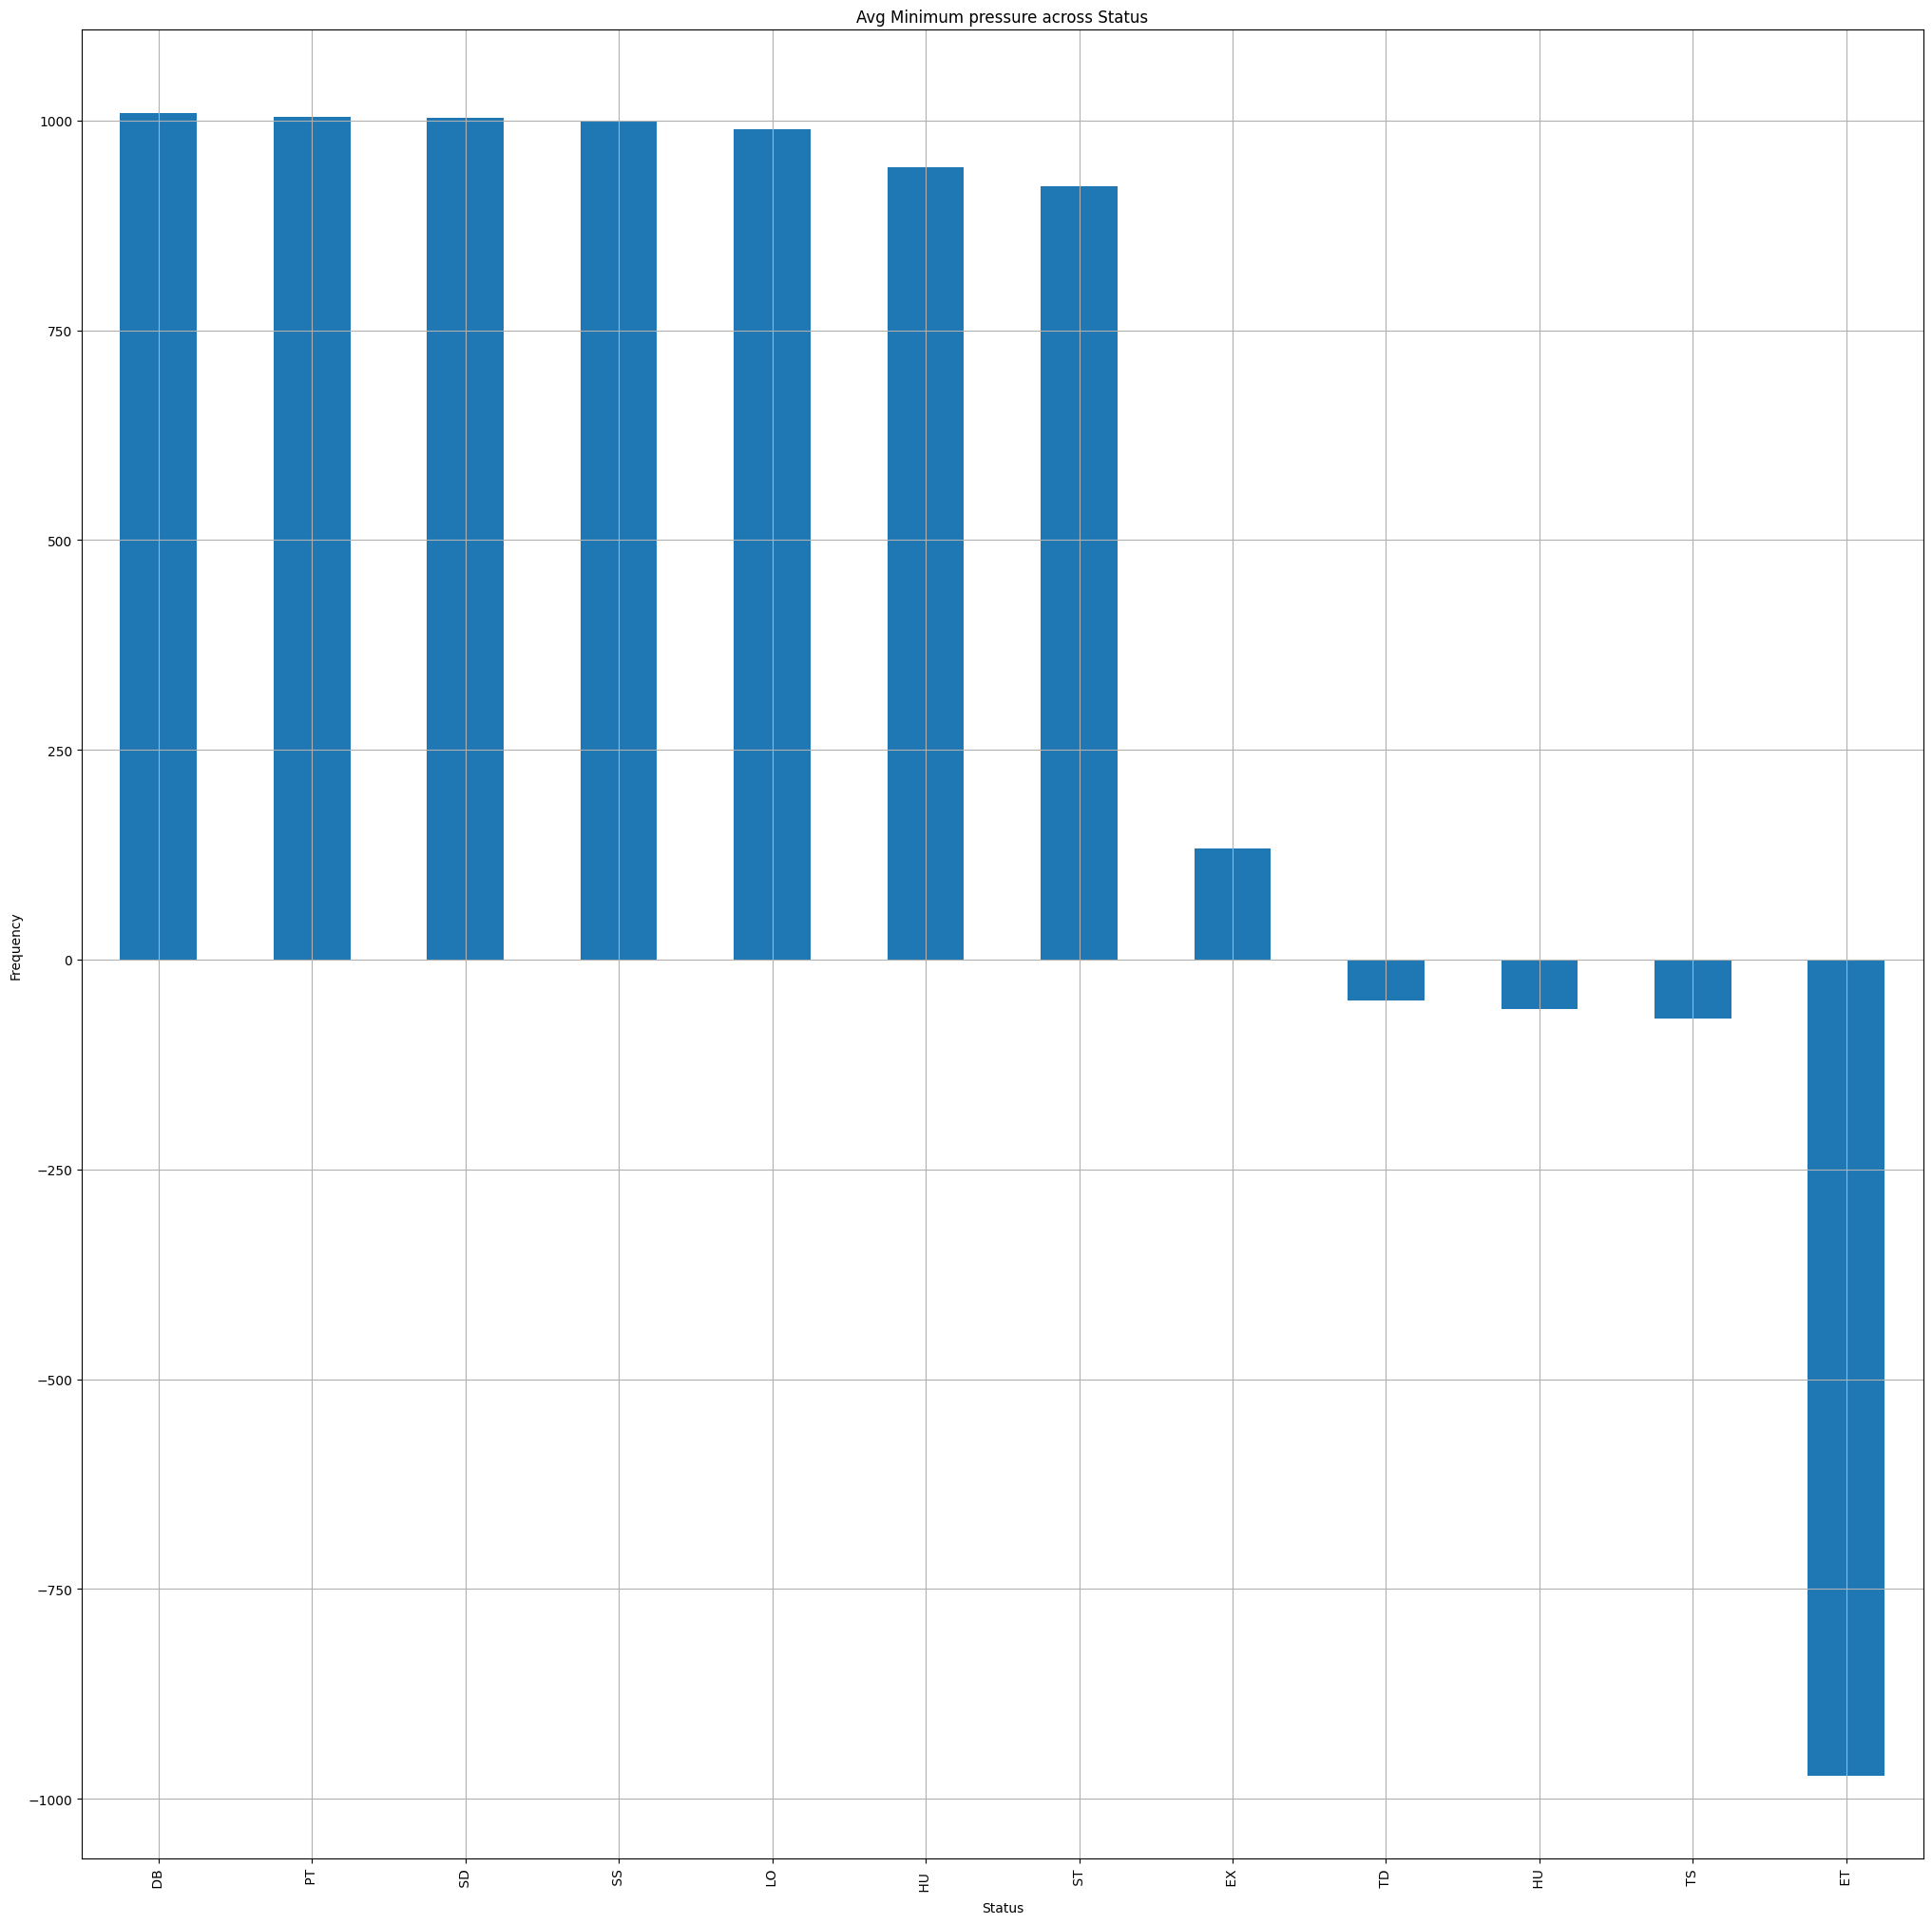

In [62]:
Min_pressure_dist.plot(kind='bar', figsize=(25,25), title="Avg Minimum pressure across Status",grid=True)
plt.ylabel('Frequency')

# Inference Of Minimum Pressure Accross Cyclones

In [ ]:
a) DB – Disturbance (of any intensity) has the heighest avg minimum pressure of 1008.82 
b) ET-  Extra tropical cyclone has the least minimum pressure 

# Exploration on Wind Speed of clcones

In [ ]:
# Check for average wind Speed across different Cyclones

In [63]:
Wind_dist=data.groupby("Status")["Maximum Wind"].mean().sort_values(ascending=False)
Wind_dist

Status
 ST     135.833333
 HU     105.000000
 HU      85.380488
 TS      44.975685
 SS      42.857143
 EX      36.000000
 PT      30.000000
 ET      29.276316
 SD      27.500000
 TD      27.363245
 LO      23.599562
 DB      22.903226
Name: Maximum Wind, dtype: float64

In [ ]:
# Plotting Bar graph for average wind speed across different cyclone status

Text(0, 0.5, 'Frequency')

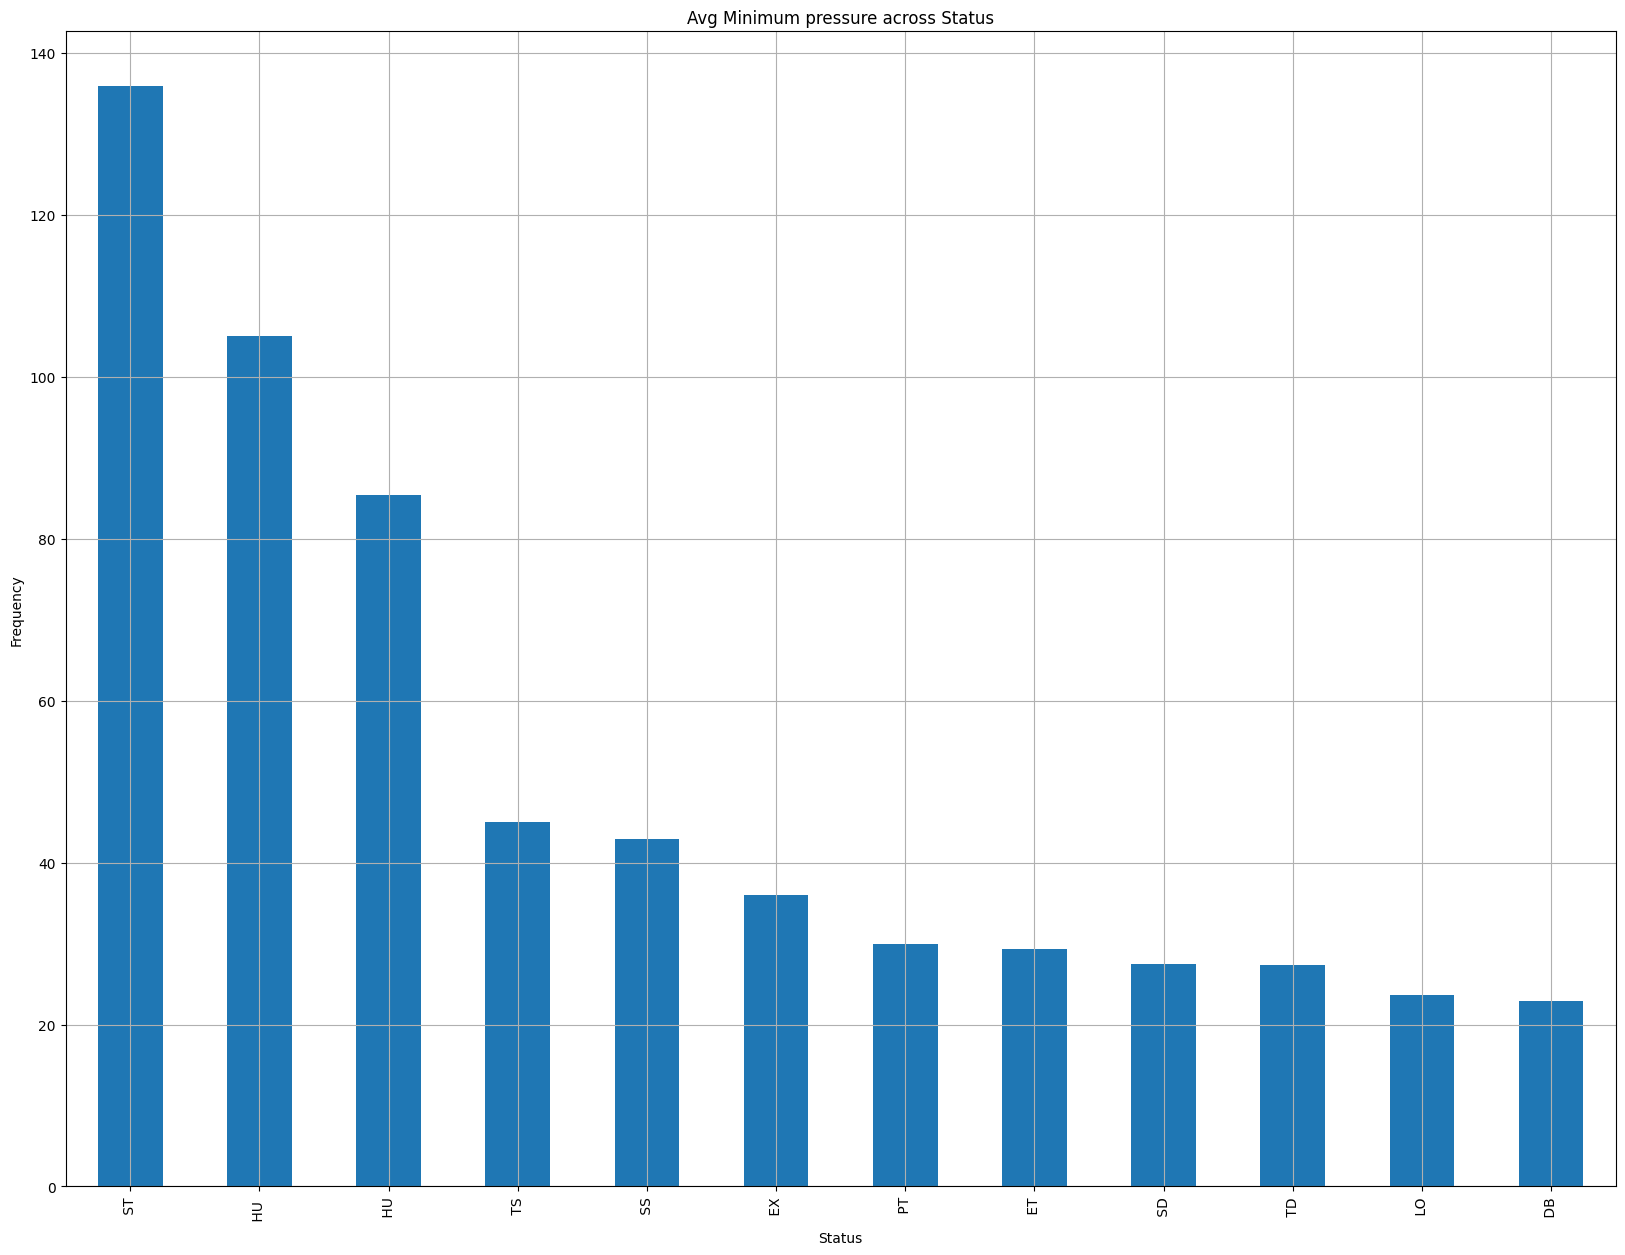

In [66]:
Wind_dist.plot(kind='bar', figsize=(20,15), title="Avg Minimum pressure across Status",grid=True)
plt.ylabel('Frequency')

# Inference On Max Wind Speed For Different Cyclones Status

In [ ]:
a) Synoptic type cyclone has a maximum wind speed average of 135.8 followed by HU – Tropical cyclone of hurricane intensity (> 64 knots) of 105
b) Disturbance( Of any Intensity) has a lowest average maximum wind speed  of 22.9

# Report After Final Analysis

In [ ]:
a) For this dataset of Pacific Hurricane and Typhoons "Decission tree" is the best suited Model with 96.5%.
b) In the data set "Unnamed cyclone" has the maximum occurances followed by "Fernand" and "John"
c) "Tropical Cyclone of Storm Intensity" cyclone status has maximum Occurances and "Subtropical Cyclone" has lowest Occurances.
d) Maximum of Cyclones has occured in "July" to "September" and Minimum has occured from "November" to "March".
e) In the year 1992 had a maximum cyclones followed by 2014
f) "DB" type status has high avg min pressure of 1008.82 and "Extra Tropical" Cyclone has the least minimum avg pressure.
g) "Synoptic Type Cyclone" has avg maximum wind speed of 135.8 and "DB" type cyclone has lowest avg wind speed